In [1]:
# -*- coding: utf-8 -*-
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
import sys
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(12345)
import scipy as sp
import os, math, random, re
%matplotlib inline

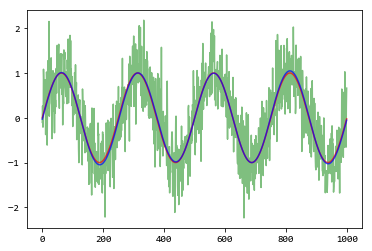

In [2]:
from scipy.fftpack import *
time_step = 0.02
period = 5
time_sequence = np.arange(0, 20, time_step)
original_sig = np.sin(2 * np.pi / period * time_sequence)
sig = original_sig +  0.5 * np.random.randn(time_sequence.size)
sig_fft = fft(sig)
sample_freq = fftfreq(sig_fft.size, d=time_step)
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]
np.allclose(freq, 1./period) # True
sig_fft[np.abs(sample_freq) > freq] = 0
main_sig =ifft(sig_fft)

plt.plot(sig, "g", label='sig', alpha=0.5)
plt.plot(original_sig, "r", label='original_sig', alpha=0.7)
plt.plot(main_sig, "b", label='main_sig', alpha=0.7)
plt.show()